<a href="https://colab.research.google.com/github/iyngaranedu/api-response/blob/develop/Model_improvements_mobilenet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os

#os.system("rm -rf ipythonUtils")
#os.system("rm -rf lesion-diagnosis")
#os.system("rm -rf lesion-diagnosis-ver2.zip")
#os.system("rm -rf test")
#os.system("rm -rf train")

isExist = os.path.exists("ipython-utils")
if not os.path.exists("ipython-utils"):
    !git clone https://github.com/iyngaran/ipythonUtils.git


if not os.path.exists("lesion-diagnosis-ver2.zip"):
    !wget  https://testing.idev55.com/lesion-diagnosis-ver2.zip

if not os.path.exists("lesion-diagnosis"):
    # Unzip the downloaded file
    zip_file = zipfile.ZipFile("lesion-diagnosis-ver2.zip", "r")
    zip_file.extractall()
    zip_file.close()

Cloning into 'ipythonUtils'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 21 (delta 6), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (21/21), done.
--2022-10-16 15:35:16--  https://testing.idev55.com/lesion-diagnosis-ver2.zip
Resolving testing.idev55.com (testing.idev55.com)... 3.84.41.34
Connecting to testing.idev55.com (testing.idev55.com)|3.84.41.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1501915604 (1.4G) [application/zip]
Saving to: ‘lesion-diagnosis-ver2.zip’

lesion-diagnosis-ve 100%[===================>]   1.40G  32.8MB/s    in 44s     

2022-10-16 15:36:01 (32.2 MB/s) - ‘lesion-diagnosis-ver2.zip’ saved [1501915604/1501915604]



In [3]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("lesion-diagnosis"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 1 images in 'lesion-diagnosis'.
There are 0 directories and 1002 images in 'lesion-diagnosis/melanoma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/basal-cell-carcinoma'.
There are 0 directories and 430 images in 'lesion-diagnosis/solar-lentigo'.
There are 0 directories and 261 images in 'lesion-diagnosis/vascular-lesion'.
There are 0 directories and 255 images in 'lesion-diagnosis/dermatofibroma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/pigmented-benign-keratosis'.
There are 0 directories and 677 images in 'lesion-diagnosis/squamous-cell-carcinoma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/seborrheic-keratosis'.
There are 0 directories and 1002 images in 'lesion-diagnosis/nevus'.
There are 0 directories and 912 images in 'lesion-diagnosis/actinic-keratosis'.


In [4]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import Augmentor
p = Augmentor.Pipeline("lesion-diagnosis/solar-lentigo")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(570) ## We are adding 570 samples.

p = Augmentor.Pipeline("lesion-diagnosis/vascular-lesion")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(739) ## We are adding 739 samples.

p = Augmentor.Pipeline("lesion-diagnosis/dermatofibroma")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(745) ## We are adding 745 samples.


p = Augmentor.Pipeline("lesion-diagnosis/squamous-cell-carcinoma")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(323) ## We are adding 323 samples.

p = Augmentor.Pipeline("lesion-diagnosis/actinic-keratosis")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(88) ## We are adding 88 samples per class.

Initialised with 428 image(s) found.
Output directory set to lesion-diagnosis/solar-lentigo/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F1C0A07FCD0>: 100%|██████████| 570/570 [02:45<00:00,  3.45 Samples/s]


Initialised with 259 image(s) found.
Output directory set to lesion-diagnosis/vascular-lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1C0A0A7350>: 100%|██████████| 739/739 [00:42<00:00, 17.51 Samples/s]


Initialised with 253 image(s) found.
Output directory set to lesion-diagnosis/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1C0A020910>: 100%|██████████| 745/745 [01:06<00:00, 11.22 Samples/s]


Initialised with 675 image(s) found.
Output directory set to lesion-diagnosis/squamous-cell-carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1C0A091110>: 100%|██████████| 323/323 [00:23<00:00, 13.73 Samples/s]


Initialised with 910 image(s) found.
Output directory set to lesion-diagnosis/actinic-keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=3264x2448 at 0x7F1C15823D10>: 100%|██████████| 88/88 [00:06<00:00, 13.12 Samples/s]


In [6]:
!mv lesion-diagnosis/solar-lentigo/output/* lesion-diagnosis/solar-lentigo/
!mv lesion-diagnosis/vascular-lesion/output/* lesion-diagnosis/vascular-lesion/
!mv lesion-diagnosis/dermatofibroma/output/* lesion-diagnosis/dermatofibroma/
!mv lesion-diagnosis/squamous-cell-carcinoma/output/* lesion-diagnosis/squamous-cell-carcinoma/
!mv lesion-diagnosis/actinic-keratosis/output/* lesion-diagnosis/actinic-keratosis/


!rm -rf lesion-diagnosis/solar-lentigo/output
!rm -rf lesion-diagnosis/vascular-lesion/output
!rm -rf lesion-diagnosis/dermatofibroma/output
!rm -rf lesion-diagnosis/squamous-cell-carcinoma/output
!rm -rf lesion-diagnosis/actinic-keratosis/output

In [7]:
for dirpath, dirnames, filenames in os.walk("lesion-diagnosis"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 1 images in 'lesion-diagnosis'.
There are 0 directories and 1002 images in 'lesion-diagnosis/melanoma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/basal-cell-carcinoma'.
There are 0 directories and 1000 images in 'lesion-diagnosis/solar-lentigo'.
There are 0 directories and 1000 images in 'lesion-diagnosis/vascular-lesion'.
There are 0 directories and 1000 images in 'lesion-diagnosis/dermatofibroma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/pigmented-benign-keratosis'.
There are 0 directories and 1000 images in 'lesion-diagnosis/squamous-cell-carcinoma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/seborrheic-keratosis'.
There are 0 directories and 1002 images in 'lesion-diagnosis/nevus'.
There are 0 directories and 1000 images in 'lesion-diagnosis/actinic-keratosis'.


In [8]:
from ipythonUtils.generateTestTrain import generate_test_and_train_datasets
if not os.path.exists("train/actinic-keratosis"):
   generate_test_and_train_datasets()

In [9]:
import pathlib
import numpy as np

data_dir = pathlib.Path("train") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['actinic-keratosis' 'basal-cell-carcinoma' 'dermatofibroma' 'melanoma'
 'nevus' 'pigmented-benign-keratosis' 'seborrheic-keratosis'
 'solar-lentigo' 'squamous-cell-carcinoma' 'vascular-lesion']


In [10]:
data_dir_train = pathlib.Path("train")
data_dir_test = pathlib.Path("test")

In [11]:
image_count_train = len(list(data_dir_train.glob('*/*.JPG')))
image_count_test = len(list(data_dir_test.glob('*/*.JPG')))
image_count_train, image_count_test

(7985, 2005)

Image shape: (2448, 3264, 3)


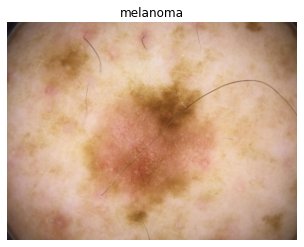

In [12]:
from ipythonUtils.generateTestTrain import view_random_image
img = view_random_image(target_dir="train", target_class="melanoma")

Image shape: (2448, 3264, 3)


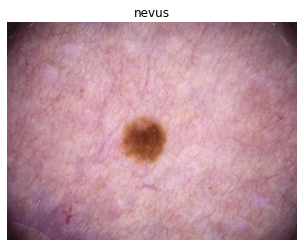

In [13]:
img2 = view_random_image(target_dir="test", target_class="nevus")

In [14]:
batch_size = 32
img_height = 224
img_width = 224
num_classes = len(class_names)
IMAGE_SHAPE = (img_width, img_height)
BATCH_SIZE = 32
epochs = 50

In [15]:
import tensorflow as tf

## create train dataset

## get all the train images and resizing them to the size of img_height*img_width and create batches
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 7985 files belonging to 10 classes.
Using 6388 files for training.


In [16]:
## create validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 7985 files belonging to 10 classes.
Using 1597 files for validation.


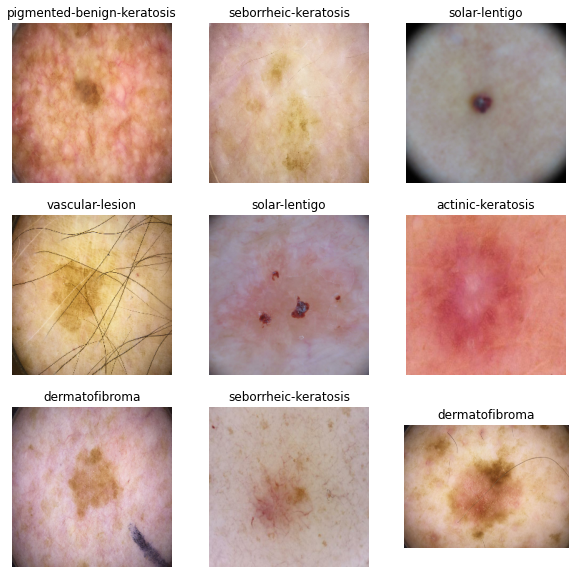

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(len(class_names)-1):
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [20]:
mobilenet_v2_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [21]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [22]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [23]:
# Create model
mobilenet_v2_model = create_model(mobilenet_v2_url, num_classes=num_classes)

# Compile
mobilenet_v2_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [25]:
# Fit the model
mobilenet_v2_history = mobilenet_v2_model.fit(train_dataset,
                                  epochs=2,
                                  steps_per_epoch=len(train_dataset),
                                  validation_data=val_dataset,
                                  validation_steps=len(val_dataset),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="mobilenet_v2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/mobilenet_v2/20221016-155357
Epoch 1/2
200/200 [==============================] - 277s 1s/step - loss: 2.0784 - accuracy: 0.2741 - val_loss: 2.0102 - val_accuracy: 0.2918
Epoch 2/2
200/200 [==============================] - 240s 1s/step - loss: 1.8466 - accuracy: 0.3438 - val_loss: 1.9579 - val_accuracy: 0.3444


In [26]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

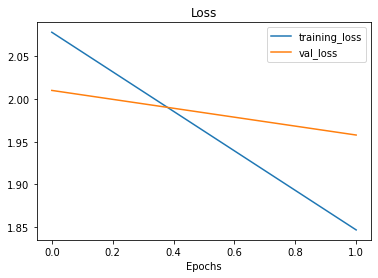

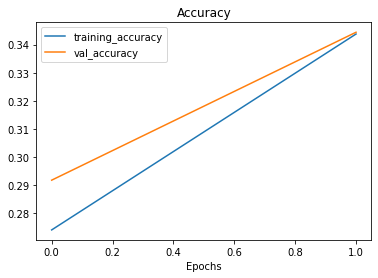

In [27]:
plot_loss_curves(mobilenet_v2_history)

In [28]:
# Resnet summary 
mobilenet_v2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1001)             3540265   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                10020     
                                                                 
Total params: 3,550,285
Trainable params: 10,020
Non-trainable params: 3,540,265
_________________________________________________________________


In [29]:
from tensorflow import keras

data_augmentation = keras.Sequential([
      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
      layers.experimental.preprocessing.RandomRotation(0.1),
      layers.experimental.preprocessing.RandomZoom(0.1),
])

In [30]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.JPG')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.JPG')) ]
print(len(lesion_list))

7985


In [31]:
df_dict_original = dict(zip(path_list, lesion_list))
list(df_dict_original.items())[:2]

[('train/melanoma/ISIC_2884038.JPG', 'melanoma'),
 ('train/melanoma/ISIC_9583969.JPG', 'melanoma')]

In [32]:
import pandas as pd
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,train/melanoma/ISIC_2884038.JPG,melanoma
1,train/melanoma/ISIC_9583969.JPG,melanoma
2,train/melanoma/ISIC_0072051.JPG,melanoma
3,train/melanoma/ISIC_7785723.JPG,melanoma
4,train/melanoma/ISIC_0903411.JPG,melanoma


In [33]:
original_df[['Label']].value_counts()

Label                     
basal-cell-carcinoma          799
melanoma                      799
nevus                         799
pigmented-benign-keratosis    799
seborrheic-keratosis          799
actinic-keratosis             798
dermatofibroma                798
solar-lentigo                 798
squamous-cell-carcinoma       798
vascular-lesion               798
dtype: int64

In [34]:
original_df[['Label']].value_counts(normalize=True)

Label                     
basal-cell-carcinoma          0.100063
melanoma                      0.100063
nevus                         0.100063
pigmented-benign-keratosis    0.100063
seborrheic-keratosis          0.100063
actinic-keratosis             0.099937
dermatofibroma                0.099937
solar-lentigo                 0.099937
squamous-cell-carcinoma       0.099937
vascular-lesion               0.099937
dtype: float64

In [35]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) ## We are adding 1000 samples per class.

Initialised with 798 image(s) found.
Output directory set to train/actinic-keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F1B958E8F10>: 100%|██████████| 2/2 [00:00<00:00,  6.00 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/basal-cell-carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F1B95A534D0>: 100%|██████████| 2/2 [00:00<00:00,  6.15 Samples/s]


Initialised with 798 image(s) found.
Output directory set to train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F1B958E8F10>: 100%|██████████| 2/2 [00:01<00:00,  1.08 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1872x1053 at 0x7F1C0A037710>: 100%|██████████| 2/2 [00:00<00:00,  4.06 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3264x2448 at 0x7F1C0A091810>: 100%|██████████| 2/2 [00:01<00:00,  1.03 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/pigmented-benign-keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1C16021610>: 100%|██████████| 2/2 [00:00<00:00, 20.82 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/seborrheic-keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F1B95A58DD0>: 100%|██████████| 2/2 [00:00<00:00,  6.25 Samples/s]


Initialised with 798 image(s) found.
Output directory set to train/solar-lentigo/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F1B95A46A90>: 100%|██████████| 2/2 [00:00<00:00,  2.56 Samples/s]


Initialised with 798 image(s) found.
Output directory set to train/squamous-cell-carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F1C0F3A5B90>: 100%|██████████| 2/2 [00:00<00:00,  4.62 Samples/s]


Initialised with 798 image(s) found.
Output directory set to train/vascular-lesion/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F1B94AB7A50>: 100%|██████████| 2/2 [00:00<00:00,  2.36 Samples/s]


In [36]:
total_train_images = len(list(data_dir_train.glob('*/output/*.JPG')))
print(total_train_images)

20


In [37]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.JPG'))]
path_list_new[:2]

['train/melanoma/output/melanoma_original_ISIC_2957732.JPG_a727fbab-abc3-46a8-aa0f-e5156dc9cc3d.JPG',
 'train/melanoma/output/melanoma_original_ISIC_6516710.JPG_078e2626-903f-4e19-b917-d8b6251be7e0.JPG']

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.JPG'))]
lesion_list_new[:2]

['melanoma', 'melanoma']

In [40]:
import pandas as pd
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

df_2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df_2)
new_df.shape

(8005, 2)

In [41]:
new_df.head()

,Path,Label
0,train/melanoma/ISIC_2884038.JPG,melanoma
1,train/melanoma/ISIC_9583969.JPG,melanoma
2,train/melanoma/ISIC_0072051.JPG,melanoma
3,train/melanoma/ISIC_7785723.JPG,melanoma
4,train/melanoma/ISIC_0903411.JPG,melanoma


In [42]:
# Checking the class distribution after adding the new images
new_df['Label'].value_counts(normalize=True)

melanoma                      0.100062
basal-cell-carcinoma          0.100062
pigmented-benign-keratosis    0.100062
seborrheic-keratosis          0.100062
nevus                         0.100062
solar-lentigo                 0.099938
vascular-lesion               0.099938
dermatofibroma                0.099938
squamous-cell-carcinoma       0.099938
actinic-keratosis             0.099938
Name: Label, dtype: float64

In [43]:
new_df['Label'].value_counts()

melanoma                      801
basal-cell-carcinoma          801
pigmented-benign-keratosis    801
seborrheic-keratosis          801
nevus                         801
solar-lentigo                 800
vascular-lesion               800
dermatofibroma                800
squamous-cell-carcinoma       800
actinic-keratosis             800
Name: Label, dtype: int64

In [44]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 10 classes.
Using 6404 files for training.


In [45]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 10 classes.
Using 1601 files for validation.


In [50]:
# Fit the model
mobilenet_v2_history = mobilenet_v2_model.fit(train_dataset,
                                  epochs=2,
                                  steps_per_epoch=len(train_dataset),
                                  validation_data=val_dataset,
                                  validation_steps=len(val_dataset),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="mobilenet_v2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/mobilenet_v2/20221016-161434
Epoch 1/2
201/201 [==============================] - 377s 2s/step - loss: 1.7521 - accuracy: 0.3724 - val_loss: 1.8827 - val_accuracy: 0.3492
Epoch 2/2
201/201 [==============================] - 369s 2s/step - loss: 1.7233 - accuracy: 0.3821 - val_loss: 1.7705 - val_accuracy: 0.3923


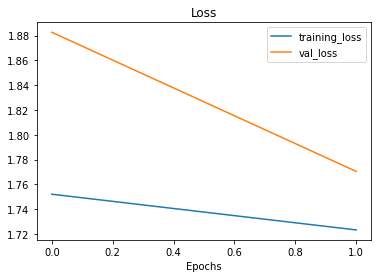

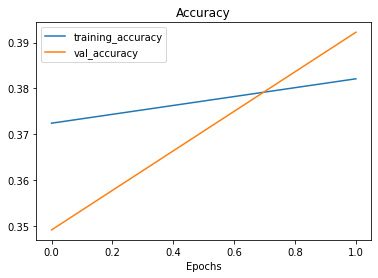

In [51]:
plot_loss_curves(mobilenet_v2_history)

ValueError: ignored

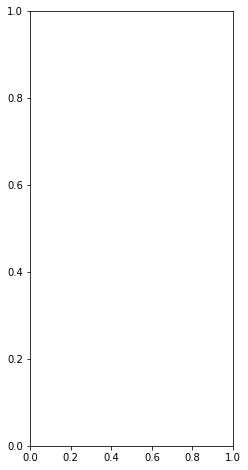

In [52]:
acc = mobilenet_v2_history.history['accuracy']
val_accuracy = mobilenet_v2_history.history['val_accuracy']

loss = mobilenet_v2_history.history['loss']
val_loss = mobilenet_v2_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
# mobilenet_v2 summary 
mobilenet_v2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1001)             3540265   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                10020     
                                                                 
Total params: 3,550,285
Trainable params: 10,020
Non-trainable params: 3,540,265
_________________________________________________________________


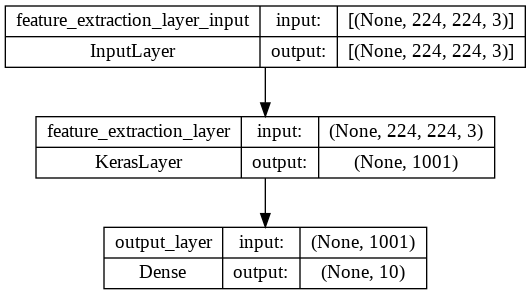

In [54]:
from keras.utils.vis_utils import plot_model

plot_model(mobilenet_v2_model, show_shapes=True, show_layer_names=True)

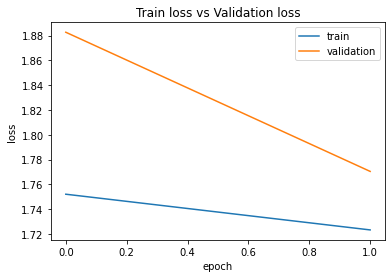

In [55]:
def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Train loss vs Validation loss')
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend([ 'train' , 'validation' ], loc='upper right') 
  plt.show()


plot_history(mobilenet_v2_history)

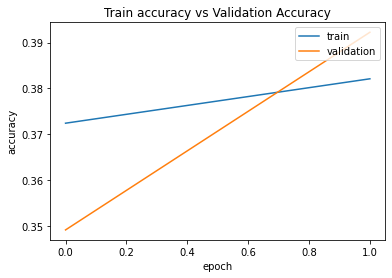

In [56]:
plt.plot(mobilenet_v2_history.history['accuracy'])
plt.plot(mobilenet_v2_history.history['val_accuracy'])
plt.title('Train accuracy vs Validation Accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend([ 'train' , 'validation' ], loc= 'upper right') 
plt.show()